In [1]:
# load libraries and datasets
import pandas as pd

df_mosque = pd.read_csv('Nigeria_Mosques.csv', header=0)
df_church = pd.read_csv('Nigeria_Churches.csv', header=0)

In [18]:
df_mosque.shape

(22379, 17)

In [19]:
df_church.shape

(33103, 17)

In [13]:
df_mosque.columns

Index(['X', 'Y', 'FID', 'globalid', 'uniq_id', 'timestamp', 'editor',
       'scdy_edtor', 'wardname', 'wardcode', 'lganame', 'lgacode', 'statename',
       'statecode', 'name', 'poi_type', 'source'],
      dtype='object')

In [17]:
df_church.columns

Index(['X', 'Y', 'FID', 'globalid', 'uniq_id', 'timestamp', 'editor',
       'scdy_edtor', 'wardname', 'wardcode', 'lganame', 'lgacode', 'statename',
       'statecode', 'source', 'poi_type', 'name'],
      dtype='object')

In [7]:
len(df_mosque.columns) == len(df_church.columns)

True

In [14]:
frames = [df_mosque, df_church]
relig_df = pd.concat(frames)

In [16]:
relig_df.shape

(55482, 17)

In [23]:
relig_df.statename.unique()

array(['Zamfara', 'Kebbi', 'Ogun', 'Adamawa', 'Benue', 'Jigawa', 'Borno',
       'Yobe', 'Gombe', 'Niger', 'Bauchi', 'Oyo', 'Ondo', 'Rivers',
       'Kano', 'Akwa Ibom', 'Fct', 'Nasarawa', 'Taraba', 'Edo', 'Kogi',
       'Plateau', 'Delta', 'Kwara', 'Abia', 'Ekiti', 'Anambra', 'Sokoto',
       'Katsina', 'Kaduna', 'Bayelsa', 'Lagos', 'Cross River', 'Imo',
       'Ebonyi', 'Enugu'], dtype=object)

In [26]:
# filter the state column to kaduna
df_kaduna = relig_df[(relig_df.statename == 'Kaduna')]
df_kaduna.statename

12419    Kaduna
12549    Kaduna
12560    Kaduna
12653    Kaduna
12681    Kaduna
          ...  
30691    Kaduna
30692    Kaduna
30733    Kaduna
30749    Kaduna
30750    Kaduna
Name: statename, Length: 2360, dtype: object

### Data Visualization

In this section, I will perform a data visualization of the religion centers using the Folium library

In [28]:
# import libraries and set map boundaries

import folium

Map = folium.Map(location = [10.5036, 7.4337], zoom_start = 14)
Map

In [31]:
df_kaduna.head(2)

X         Y    FID                              globalid   
12419  7.99424  10.10546  12420  ed321fcd-c285-4477-9a2c-01eeba6aa9b3  \
12549  8.16444  11.31917  12550  05c5558c-3d09-477a-80f8-c885fe272588   

       uniq_id               timestamp             editor scdy_edtor wardname   
12419   100433  2017/10/18 00:00:00+00  racheal.olarewaju               Agunu  \
12549   100540  2017/10/18 00:00:00+00  racheal.olarewaju             Saulawa   

      wardcode lganame  lgacode statename statecode             name poi_type   
12419   KD0801  Kachia    19008    Kaduna        KD     Tarde Mosque   Mosque  \
12549   KD0509   Ikara    19005    Kaduna        KD  Pampaida Mosque   Mosque   

      source  
12419  OSGOF  
12549  OSGOF

In [43]:
Map = folium.Map(location = [10.5036, 7.4337], zoom_start = 14)

color = {
    'Mosque':'blue',
    'Church': 'red'
}

for index, row in df_kaduna.iterrows():
    x_coord = row['X']
    y_coord = row['Y']
    
    cord = (y_coord, x_coord)
    
    category_color = color.get(row['poi_type'])
    
    folium.CircleMarker(location=cord, color=category_color, radius=1.5, weight=2).add_to(Map)
Map
    
    

In [63]:
import folium

# Create the map
Map = folium.Map(location=[10.5036, 7.4337], zoom_start=14)

# Define colors for different categories
color = {
    'Mosque': 'blue',
    'Church': 'red'
}

# Iterate over the DataFrame
for index, row in df_kaduna.iterrows():
    # Extract coordinates
    x_coord = row['X']  
    y_coord = row['Y']  
    
    # Create a tuple representing the coordinates in the correct order (latitude, longitude)
    cord = (y_coord, x_coord)
    
    # Determine the color based on the category
    category_color = color.get(row['poi_type'])
    
     
    # Add Marker to the map with the determined color and label
    folium.Marker(location=cord, icon=folium.Icon(color=category_color), 
                  popup=row['name']).add_to(Map)

# Add text to the map
text = "Designed by: Yusuf Suleiman"
html_text = folium.Html('<b>' + text + '</b>', script=True)
popup = folium.Popup(html_text, parse_html=True)
folium.Marker([10.47954,7.46483], popup=popup).add_to(Map)

# text = "Designed by: Yusuf Suleiman"
# folium.Marker([10.47954,7.44439], popup=text).add_to(Map)

# Display the map
Map


<Axes: xlabel='lganame'>

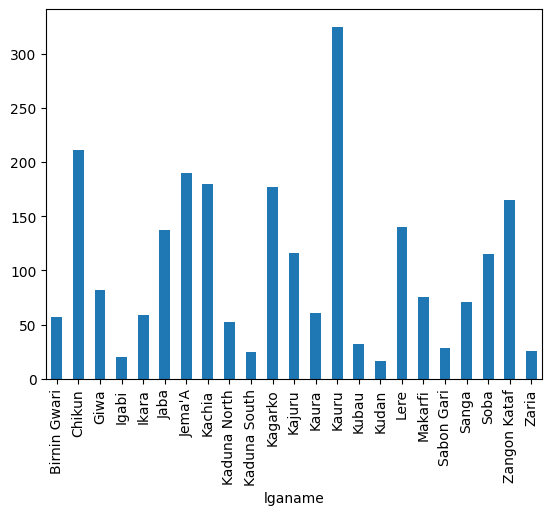

In [67]:
df_kaduna.lganame.value_counts().sort_index().plot.bar()

In [73]:
df_kaduna.groupby('lganame')['poi_type'].value_counts()

lganame       poi_type
Birnin Gwari  Mosque       47
              Church       10
Chikun        Church      175
              Mosque       36
Giwa          Mosque       74
              Church        8
Igabi         Mosque       18
              Church        2
Ikara         Mosque       38
              Church       21
Jaba          Church      128
              Mosque        9
Jema'A        Church      172
              Mosque       18
Kachia        Church      165
              Mosque       15
Kaduna North  Church       30
              Mosque       22
Kaduna South  Mosque       16
              Church        9
Kagarko       Church      153
              Mosque       24
Kajuru        Church      111
              Mosque        5
Kaura         Church       58
              Mosque        3
Kauru         Church      258
              Mosque       67
Kubau         Mosque       25
              Church        7
Kudan         Mosque       16
Lere          Church      108
              Mos